# FAKE NEWS CLASSIFIER

Import All the basic modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Import the news csv file which contains the train and test data:

In [2]:
df=pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

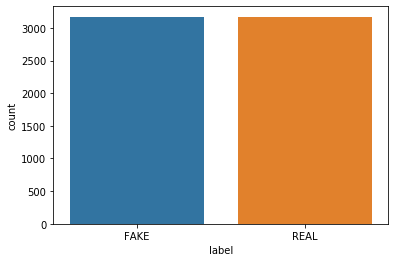

In [5]:
sns.countplot(x="label", data=df)#plot to check the no.of Fake and real news count

Import train, test, split and preprocessing modules: 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
y=df.label
x=df.text

In [8]:
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [9]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
y.shape

(6335,)

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=101)

In [12]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [13]:
tf_train=tfidf_vectorizer.fit_transform(x_train) 
tf_test=tfidf_vectorizer.transform(x_test)

In [14]:
tf_train.shape

(4434, 57938)

In [15]:
tf_test.shape

(1901, 57938)

PassiveAggressiveClassifier for analyzing the data:

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [18]:
y_pred=pac.predict(tf_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy: {}%".format(round(score*100,2)))

Accuracy: 93.69%


In [19]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[896,  47],
       [ 73, 885]], dtype=int64)

# Code to scrap data from inshorts:

In [20]:
from urllib.request import urlopen as req
from bs4 import BeautifulSoup as soup
import csv
my_url="https://inshorts.com/en/read"

uclient = req(my_url)
page_html = uclient.read()
uclient.close()
page_soup = soup(page_html, "html.parser")
containers = page_soup.findAll("div", {"class" : "card-stack"})

filename = "news_scrap.csv"
f = open(filename, "w", encoding="utf-8")

#headers = "title,text\n"
#f.write(headers)

row_list = [
    ["Title", "Text"],]

for container in containers:
    for i in range(20):
    
        title_container = container.find_all("span", {"itemprop": "headline"})
        title = title_container[i].text

        article_container = container.find_all("div", {"itemprop": "articleBody"})
        article = article_container[i].text
        row_list.append([title, article])

print(row_list)
f.close()

with open('inshorts.csv', 'w', newline='',encoding='utf-8') as file:
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerows(row_list)


[['Title', 'Text'], ["He would wish he was born in India: Chinmayi on Harvey's 23 yrs jail sentence", 'After American producer Harvey Weinstein was sentenced to 23 years in prison, singer Chinmayi Sripaada tweeted, "He\'d wish he [was] born in India. Especially in Tamil Nadu." "He\'d have been partying with stars, politicians...[would] actually be supported by political parties 100%," she added. Harvey was found guilty of raping a woman and forcing oral sex on a production assistant.'], ["Don't call coronavirus a hype on social media, don't be overconfident: Parineeti", 'Parineeti Chopra has shared a post on coronavirus written by a woman in Italy, who wrote "the only way to stop it is to limit contagion". "Guys stop being overconfident and read this! Stop calling it a \'hype on social media\'. Stop saying \'it only affects the elderly\'," wrote Parineeti. "Coronavirus is...extremely contagious and unstoppable. Please be smart," she added.'], ["India's biggest stockbroker Zerodha makes

Load the data to be predicted:

In [21]:
pred_data=pd.read_csv("inshorts.csv")

In [22]:
pred_text=pred_data.Text
pred_title=pred_data.Title

In [23]:
pred_text_tranf=tfidf_vectorizer.transform(pred_text) 

In [25]:
pred_text_tranf.shape

(20, 57938)

# Predicted data after analyzing:

In [26]:
y_pred=pac.predict(pred_text_tranf)

for i in zip(pred_title,y_pred):
    print(i)

("He would wish he was born in India: Chinmayi on Harvey's 23 yrs jail sentence", 'FAKE')
("Don't call coronavirus a hype on social media, don't be overconfident: Parineeti", 'FAKE')
("India's biggest stockbroker Zerodha makes work from home must for all 1,200 staff", 'REAL')
("Coronavirus is a 'controllable pandemic': WHO", 'REAL')
('Travel bans ineffective in battle against coronavirus, says Asian airline group', 'REAL')
('All 22 MLAs are with Scindia on their own, say 6 Congress MLAs', 'REAL')
("Scindia left as he got worried about future, won't get respect in BJP: Rahul", 'FAKE')
('MP Assembly Speaker asks rebel Cong MLAs to appear before him by tomorrow', 'REAL')
('Police were helping those indulging in violence: Kapil Sibal on Delhi riots', 'REAL')
('Noida firm director shoots 2 officials at board meeting, later kills self', 'FAKE')
('₹11.4 lakh crore wiped off in 1 day as Sensex records biggest fall in 11 years ', 'FAKE')
("Kapil shares his pic in mask amid coronavirus, says 'sa